In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
diabetes_data = pd.read_csv('.../diabetes.csv')

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


On these columns, a value of zero does not make sense and thus indicates missing value. Affected columns are Glucose, BloodPressure, SkinThickness, Insulin and BMI. The best solution is to replace zeros with appropiate values

In [6]:
diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [7]:
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


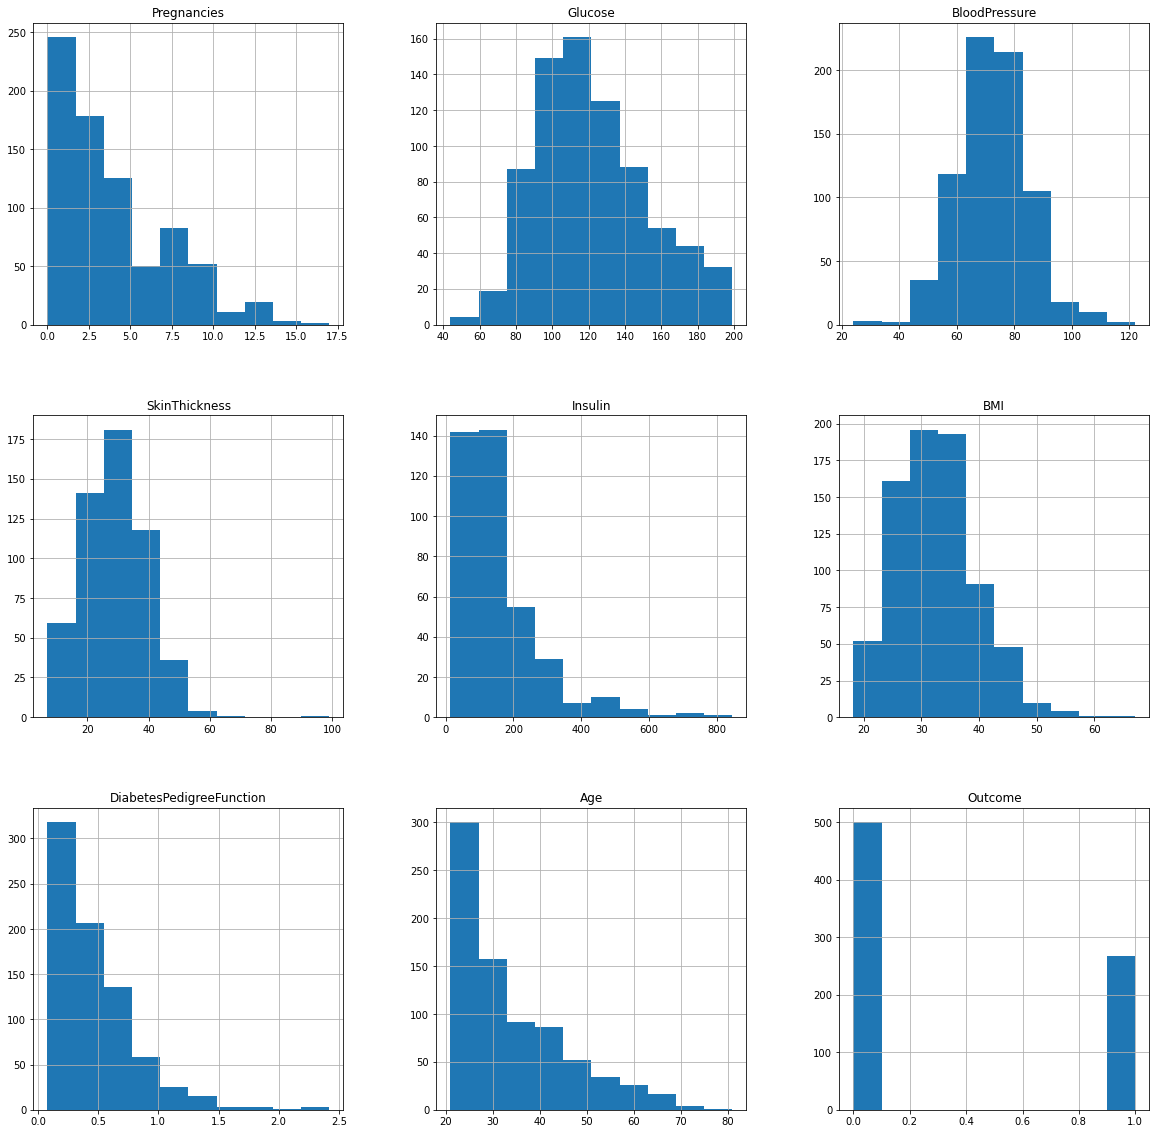

In [8]:
p = diabetes_data_copy.hist(figsize=(20, 20))

To solve the problem of NaN values and according to the above charts, I'm going to replace null values with the mean for each feature normally distributed. For skewed features it's better to impute the median.

In [9]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

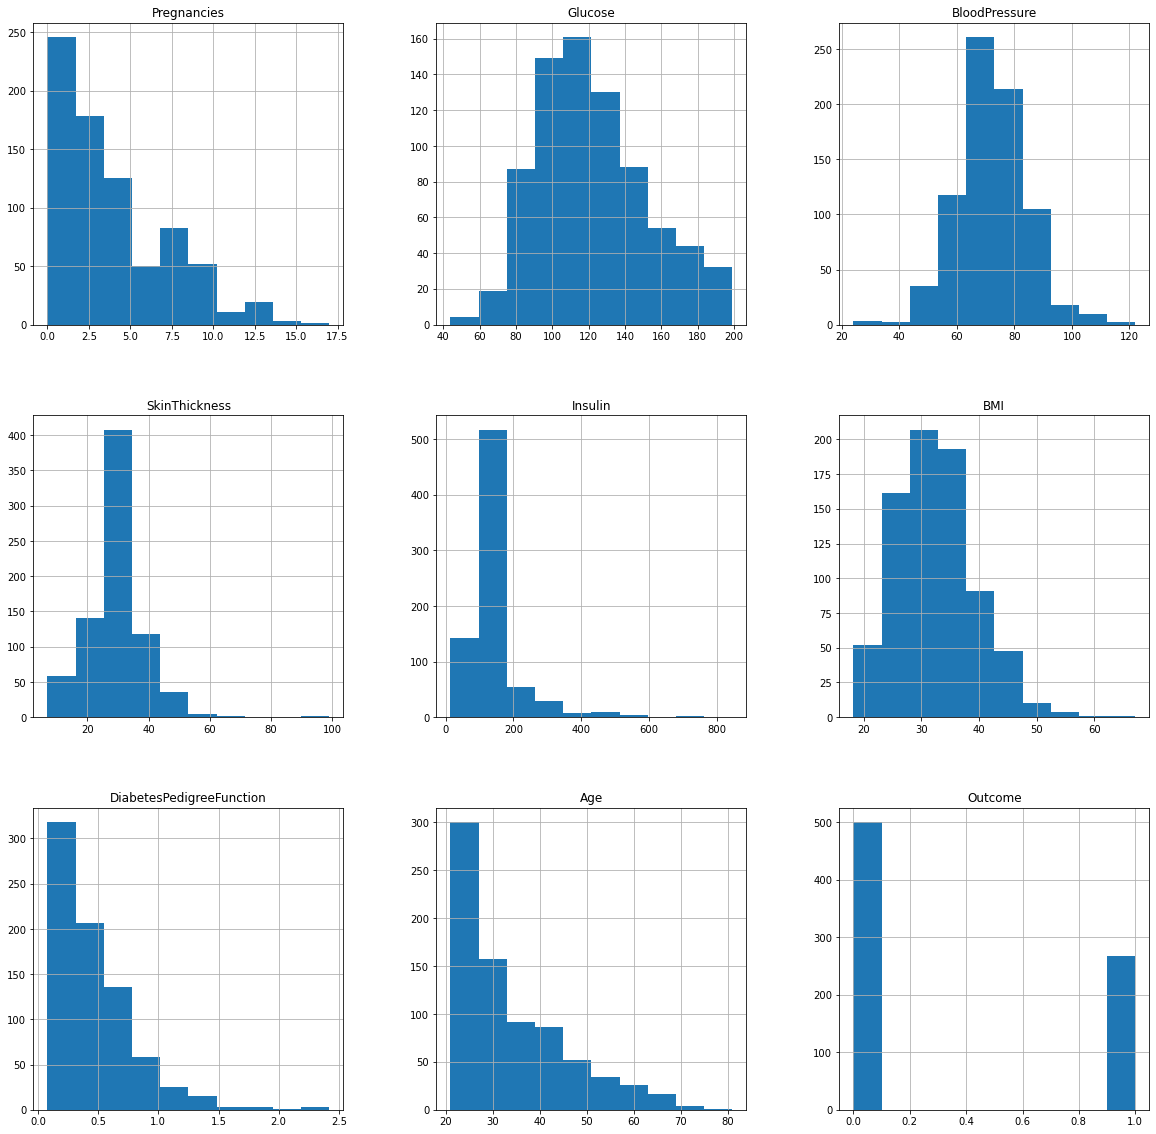

In [10]:
p = diabetes_data_copy.hist(figsize=(20, 20))

In [11]:
diabetes_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


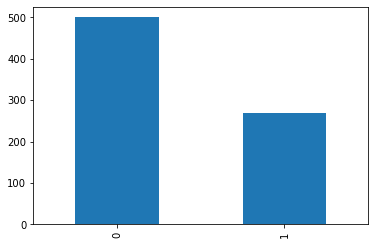

In [12]:
# Let's see if our target variable 'Outcome' is balanced
print(diabetes_data.Outcome.value_counts())
p  = diabetes_data.Outcome.value_counts().plot(kind = 'bar')

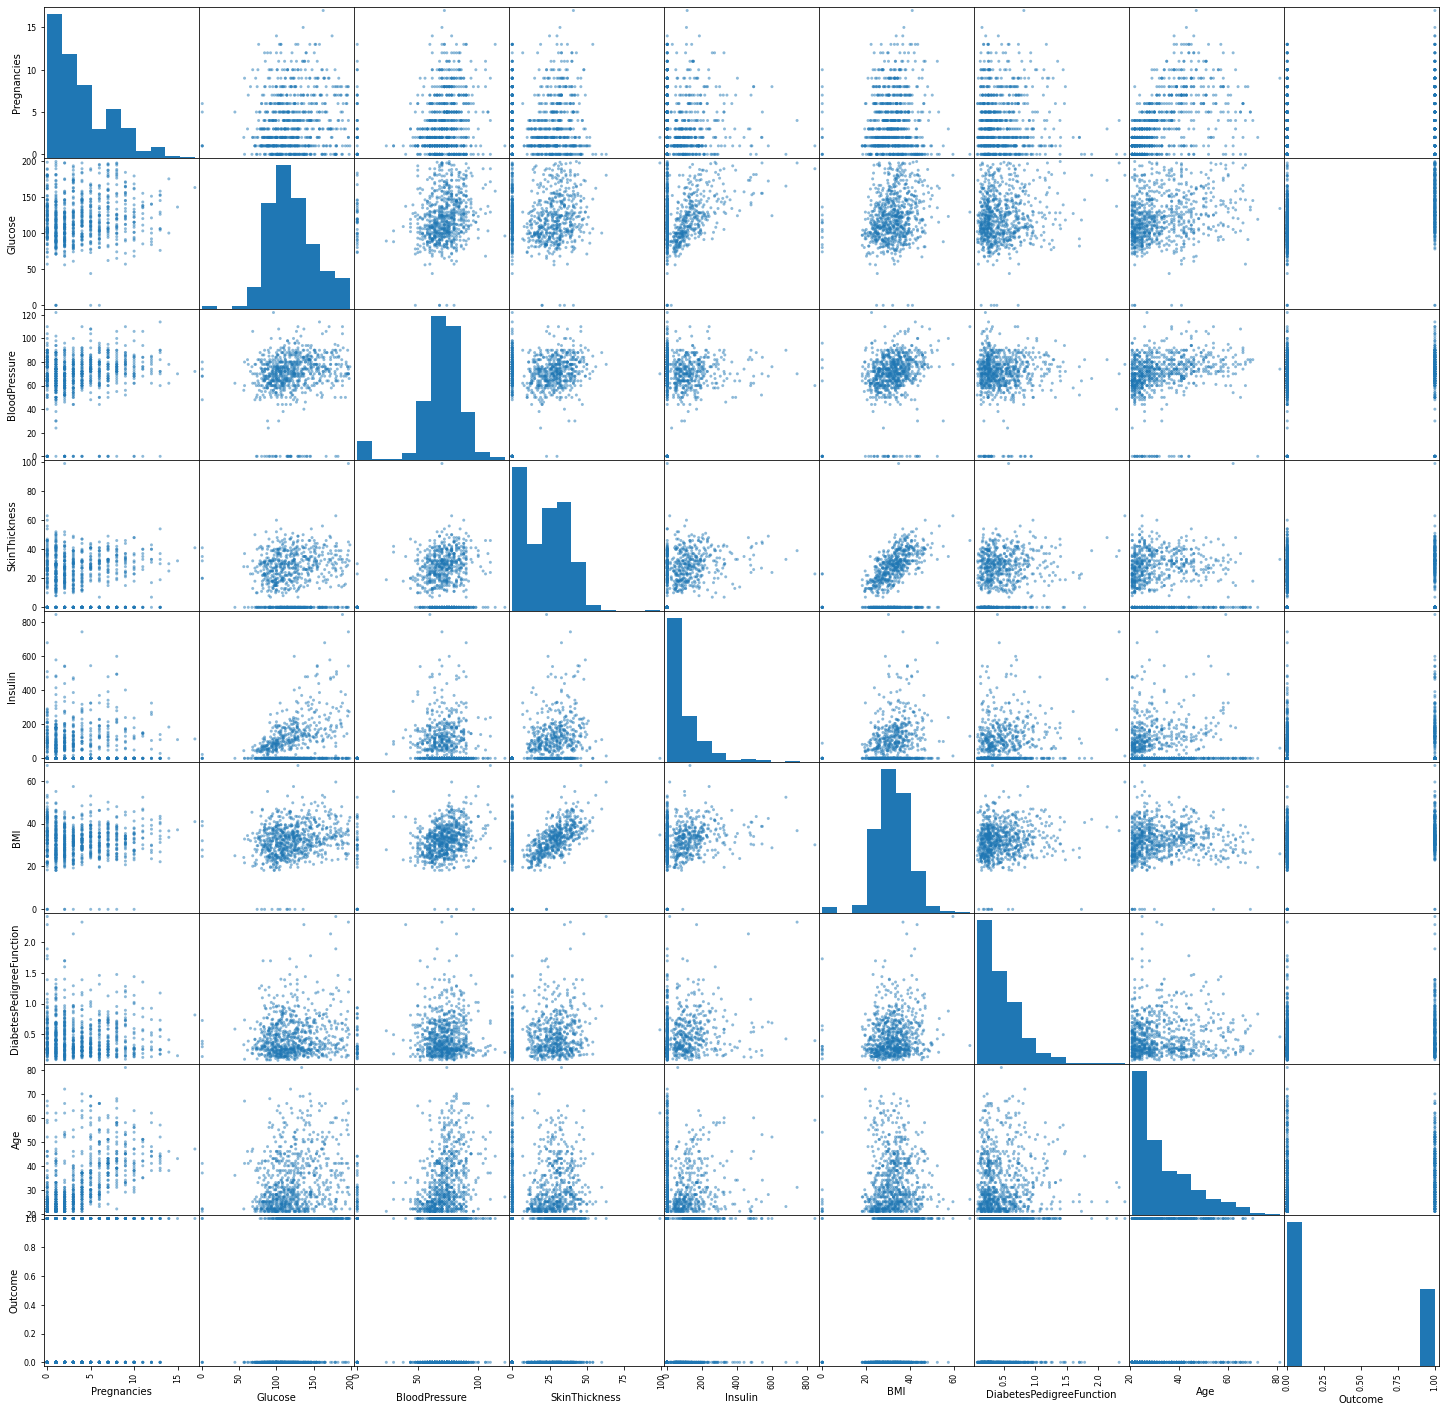

In [13]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes_data, figsize=(25,25))

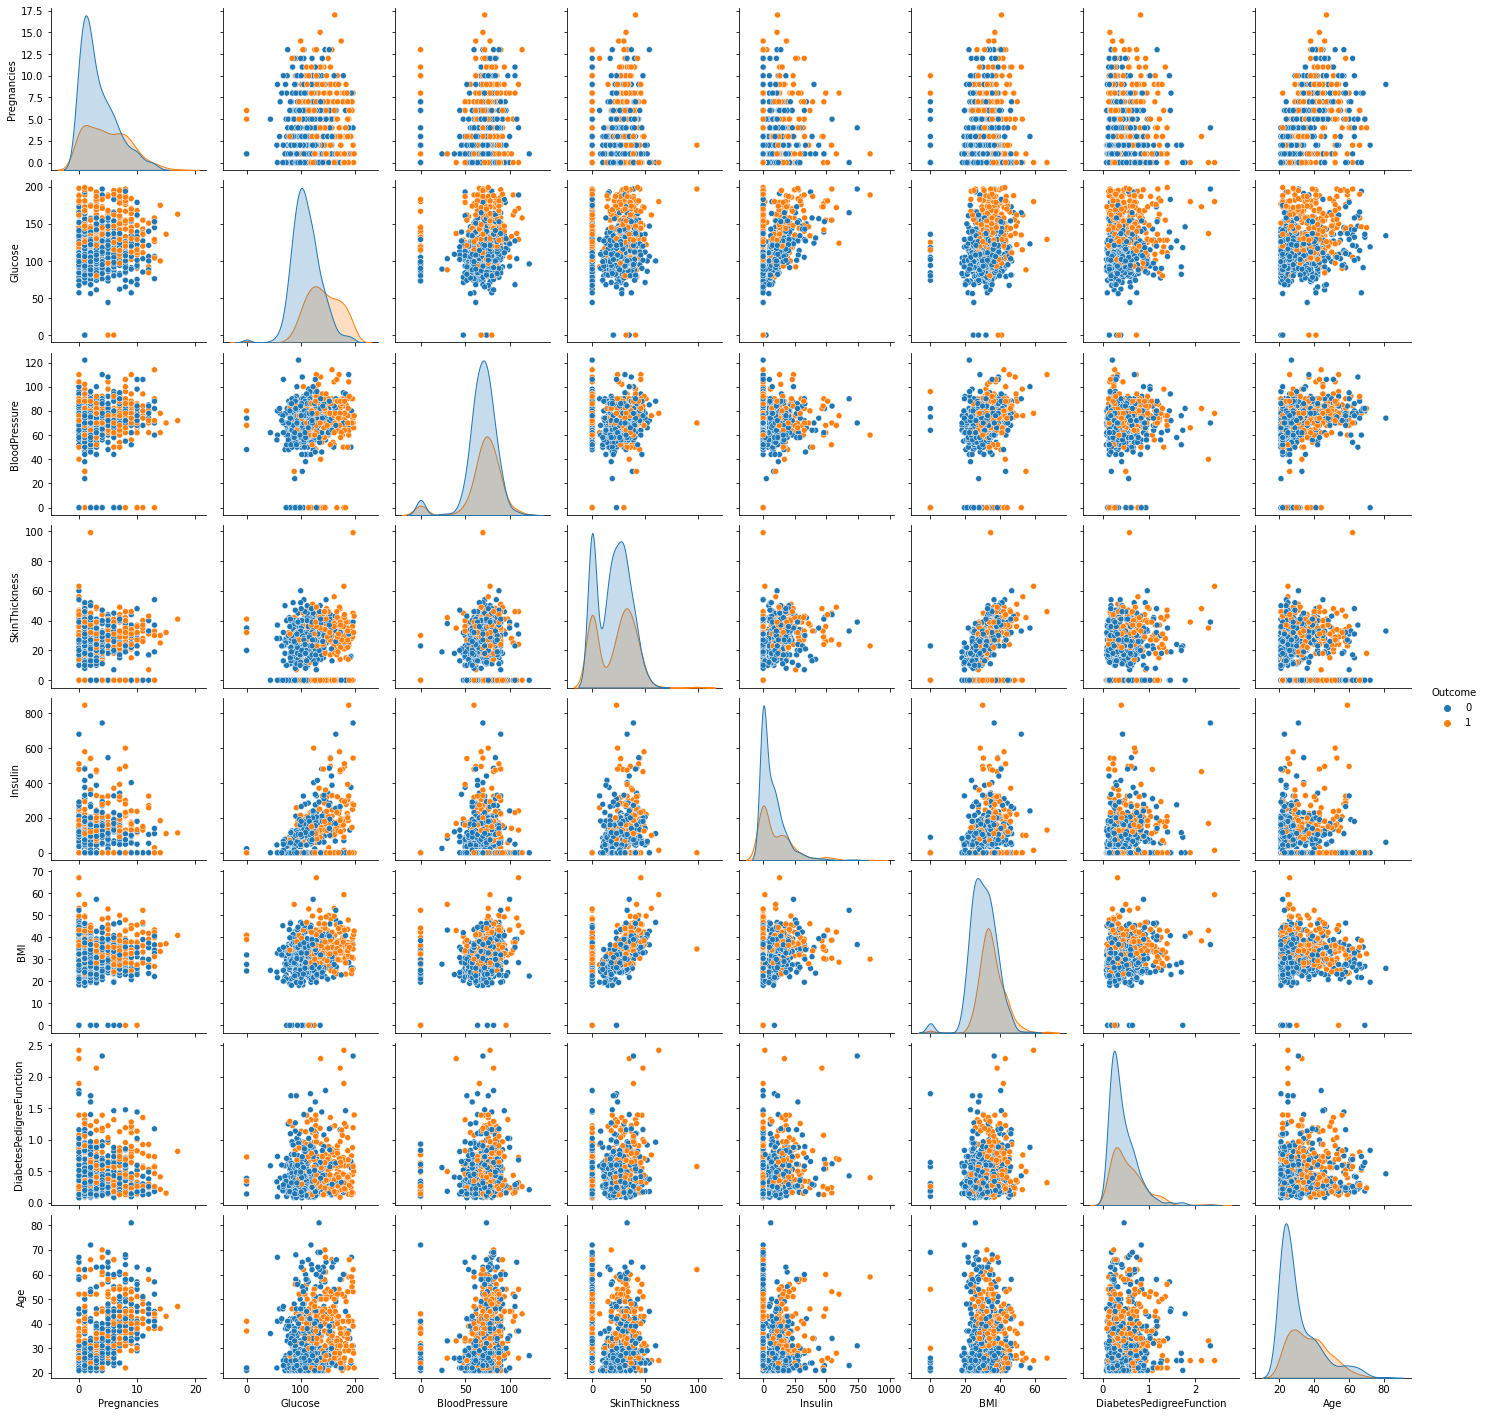

In [14]:
sns.pairplot(diabetes_data, hue='Outcome')

<AxesSubplot:>

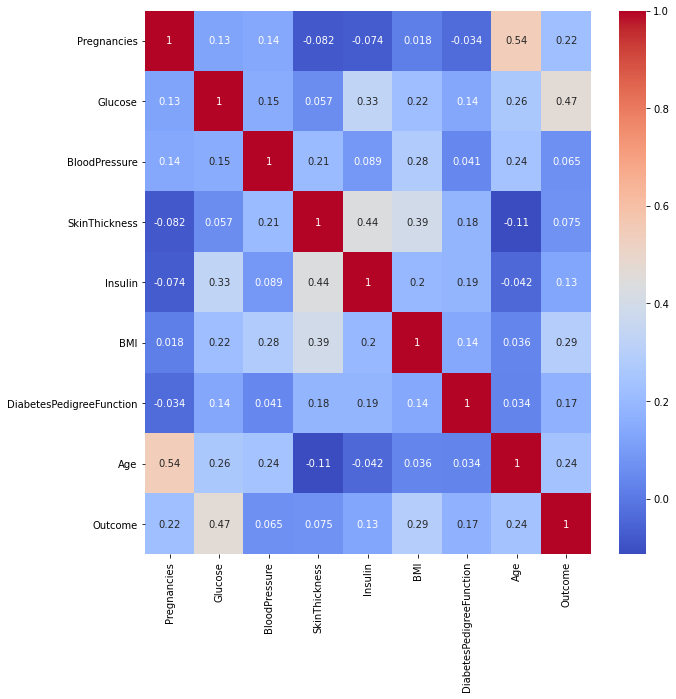

In [15]:
#Heatmap for unclean data
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

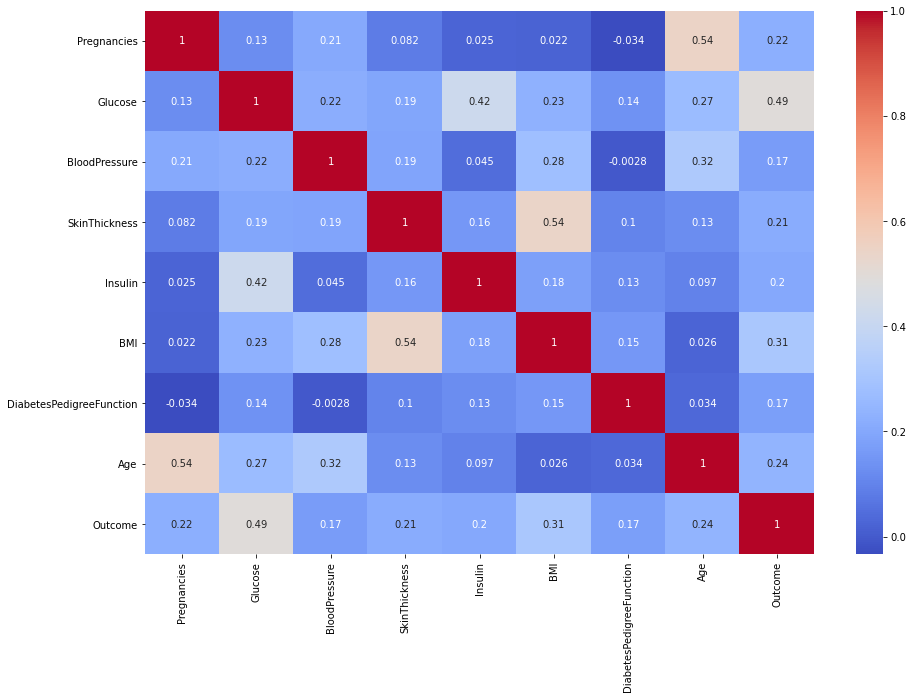

In [16]:
#Heatmap for clean data
plt.figure(figsize=(15,10))
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap='coolwarm')

In [17]:
#Our data variables have different scales, so it's advisable to scale the data for the KNN

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X = diabetes_data_copy.drop('Outcome', axis = 1)
y = diabetes_data_copy['Outcome']

In [19]:
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [20]:
X_scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

test_score = []
train_score = []

for i in range(1, 50):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cim_3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

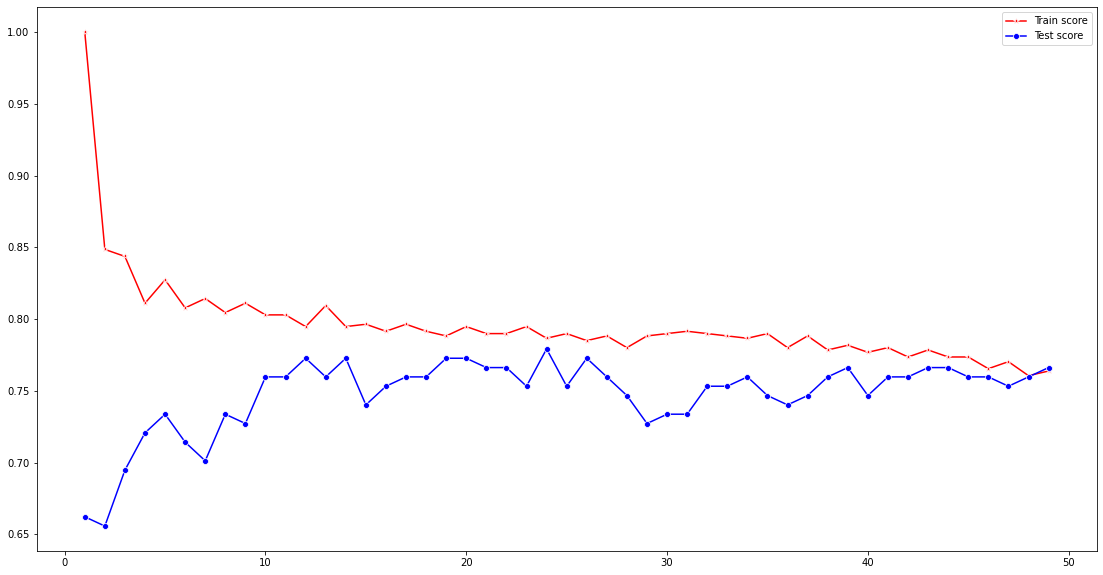

In [23]:
plt.figure(figsize = (19, 10))
sns.lineplot(range(1, 50), train_score, marker = '*', color = 'r', label = 'Train score')
sns.lineplot(range(1, 50), test_score, marker = 'o', color = 'b', label = 'Test score')

In [24]:
error_rate=[]

for i in range(1, 50):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

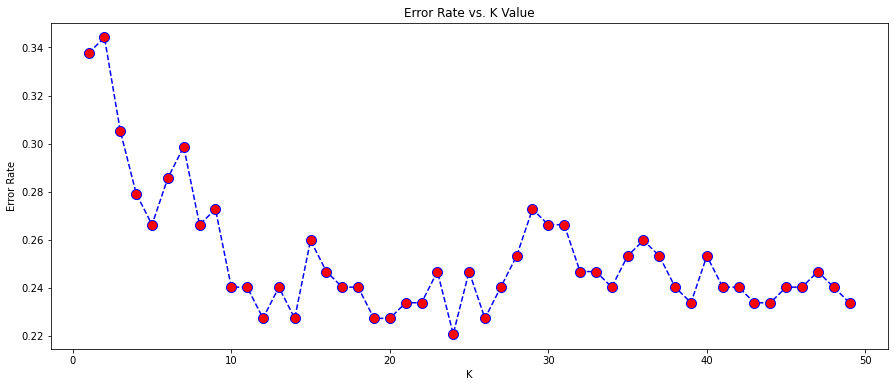

In [25]:
plt.figure(figsize=(15,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [24]


In [28]:
#The best results is captured at k = 24. Let's develop a model for each one

In [41]:
# k = 24
k = 24
knn = KNeighborsClassifier(k)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn.predict(X_test)
print('--------------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------------------')
print(classification_report(y_test, y_pred))

0.7792207792207793
--------------------------------
[[89 10]
 [24 31]]
--------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, y)


print('Best score ' + str(knn_cv.best_score_))
print('Best parameters ' + str(knn_cv.best_params_))

Best score 0.7526440879382056
Best parameters {'n_neighbors': 31}
